<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
from skimage import feature as skfeat
from skimage.transform import resize
import os
import pickle
import cv2
from skimage.color import rgb2gray

In [2]:
types=['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin',
       'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']

In [3]:
figsize=(50,50)

In [4]:
data_from_nb1=pd.read_pickle("starting_data.pkl")
starting_data=pd.read_pickle("starting_data.pkl")

In [8]:
starting_data

,Pictures,Encoding
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,"[[[88, 56, 17], [95, 63, 24], [101, 69, 30], [...",0
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
...,...,...
1496,"[[[113, 106, 90], [105, 104, 84], [110, 107, 8...",19
1497,"[[[36, 37, 58], [22, 24, 45], [18, 23, 42], [1...",19
1498,"[[[224, 218, 218], [216, 210, 210], [217, 213,...",19
1499,"[[[132, 138, 90], [137, 143, 95], [148, 151, 1...",19


In [5]:
#Returns the matrix with color c-channel values
def color_matrix(image, c):
#    print(image.shape)
#     print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
#     print(image)
#     values = [[0 for i in range(0, len(image[0]))] for j in range(0,len(image))]
#     for i in range(0,len(image)):
#         for j in range(0,len(image[0])):
#             values[i][j] = image[i][j][c]
#    return np.matrix(values)
    return image[:, :, c]

In [6]:
# Returns the pixel size of the image
def ft0(image):
    return image.size

# Returns the average of the red-channel pictures for the images
def ft1(image):
    if len(image.shape)>=3:
        reds = color_matrix(image, 0)
        return reds.mean()
    return 0

#Returns the aspect ratio of the image
def ft2(image):
    return len(image) / len(image[0])

#Returns the average of the green-channel pictures for the images
def ft3(image):
    if len(image.shape)>=3:
        greens = color_matrix(image, 1)
        return greens.mean()
    return 0

#Returns the average of the blue-channel pictures for the images
def ft4(image):
    if len(image.shape)>=3:
        blues = color_matrix(image, 2)
        return blues.mean()
    return 0

# Returns the standard deviation of the red-channel pictures for the images
def ft5(image):
    if len(image.shape)>=3:
        reds = color_matrix(image, 0)
        return reds.std()
    return 0

#Returns the standard deviation of the green-channel pictures for the images
def ft6(image):
    if len(image.shape)>=3:
        greens = color_matrix(image, 1)
        return greens.std()
    return 0

#Returns the standard deviation of the blue-channel pictures for the images
def ft7(image):
    if len(image.shape)>=3:
        blues = color_matrix(image, 2)
        return blues.std()
    return 0

#Returns the standard deviation of the grey-channel pictures for the grey_scaled images
def ft8(image_g):
    greys = np.matrix(image_g)
    return greys.std()

# Returns colorfulness of an image
# https://www.pyimagesearch.com/2017/06/05/computing-image-colorfulness-with-opencv-and-python/
def ft9(image):
    if len(image.shape)<3:
        return 0
    (B, G, R) = image[:, :, 0], image[:, :, 1], image[:, :, 2]
 
    # compute rg = R - G
    rg = np.absolute(R - G)
 
    # compute yb = 0.5 * (R + G) - B
    yb = np.absolute(0.5 * (R + G) - B)
 
    # compute the mean and standard deviation of both `rg` and `yb`
    (rbMean, rbStd) = (np.mean(rg), np.std(rg))
    (ybMean, ybStd) = (np.mean(yb), np.std(yb))
 
    # combine the mean and standard deviations
    stdRoot = np.sqrt((rbStd ** 2) + (ybStd ** 2))
    meanRoot = np.sqrt((rbMean ** 2) + (ybMean ** 2))
 
    # derive the "colorfulness" metric and return it
    return stdRoot + (0.3 * meanRoot)

#Returns the number of blobs in gray scaled image
#https://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.blob_dog
def ft10(image):
    return len(skfeat.blob_doh(image))

#Returns the rank of the red-channel matrix
def ft11(image):
    if len(image.shape)>=3:
        reds = color_matrix(image, 0)
        return np.linalg.matrix_rank(reds)/min(len(reds), len(reds[0]))
    return 0

#Returns the edge matrix of the image
def ft12(image_g):
    image_resized = resize(image_g, output_shape=figsize)
    image_resized =skfeat.canny(image_resized)
    return image_resized

#Returns the rank of the green-channel matrix
def ft13(image):
    if len(image.shape)<3:
        return 0
    greens = color_matrix(image, 1)
    return np.linalg.matrix_rank(greens)/min(len(greens), len(greens[0]))

#Returns the rank of the blue-channel matrix
def ft14(image):
    if len(image.shape)<3:
        return 0
    blues = color_matrix(image, 2)
    return np.linalg.matrix_rank(blues)/min(len(blues), len(blues[0]))

In [7]:
def read_organize_data_g(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    
    pics=[]
    enc=[]
    for i in range(0,len(types)):
        typedir = os.path.join(file_path, types[i])
        for file in os.listdir(typedir):
            filename=os.path.join(typedir, file)
            pics.append(io.imread(filename, as_grey=True))
            enc.append(i)
    df=pd.DataFrame({
        'Pictures': pics,
        'Encoding': enc
    })
    
    return df

In [8]:
starting_data_g = read_organize_data_g("/Users/xuwencc/Downloads/final_project/20_categories_training/20_categories_training")
starting_data_g

//anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


,Pictures,Encoding
0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
1,"[[0.23524745098039215, 0.26269843137254906, 0....",0
2,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
3,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
4,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",0
...,...,...
1496,"[[0.41699568627450984, 0.40302156862745103, 0....",19
1497,"[[0.15020235294117645, 0.09838862745098038, 0....",19
1498,"[[0.8599019607843137, 0.8285294117647058, 0.83...",19
1499,"[[0.522604705882353, 0.5422125490196079, 0.576...",19


 We expect all external sources sited, and significant indication of EDA. 

<h4> Graphs </h4>

We first display three selected pictures from our learning dataset. 

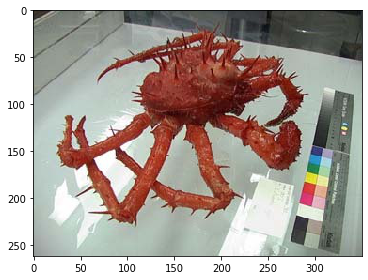

In [7]:
filepath = "/Users/xuwencc/Downloads/final_project/20_categories_training/20_categories_training"

file1 = os.path.join(filepath + '/crab', 'crab_0001.jpg')
crab = io.imread(file1)
skimage.io.imshow(crab);

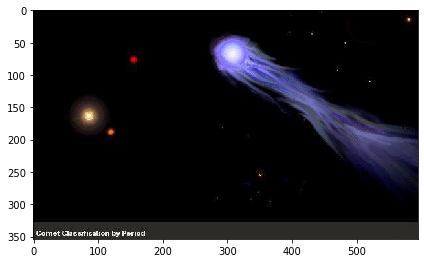

In [8]:
file2 = os.path.join(filepath + '/comet', 'comet_0001.jpg')
comet = io.imread(file2)
skimage.io.imshow(comet);

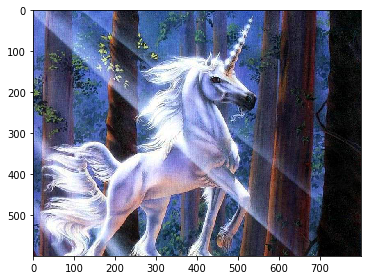

In [9]:
file3 = os.path.join(filepath + '/unicorn', 'unicorn_0001.jpg')
unicorn = io.imread(file3)
skimage.io.imshow(unicorn);

From the three picture that we display, We can see that there are different types of pictures mixing up the real camera taken picture and drawing picture.
<br>
<br>

We create a new dataframe to help our EDA progress.

In [10]:
# Extract specific 
def color_values(image, c):
    values=[]
    for i in range(0,len(image)):
        for j in range(0,len(image[0])):
            values.append(image[i][j][c])
    return values


# Creating new data frame.
df_eda = pd.DataFrame({
        'image_size': starting_data['Pictures'].apply(lambda img: img.size),
        'pic_ratio':starting_data['Pictures'].apply(lambda img: len(img)/len(img[0])),
        'pixel_mean':starting_data['Pictures'].apply(lambda img: np.mean(img)),
        'pixel_sd':starting_data['Pictures'].apply(lambda img: np.std(img)),
        'Encoding':starting_data['Encoding']
    })

df_eda['Encoding'] = df_eda['Encoding'].map({0:'airplanes', 1:'bear', 2:'blimp', 3:'comet', 4:'crab', 5:'dog', 6:'dolphin', 7:'giraffe', 8:'goat', 9:'gorilla', 10:'kangaroo', 11:'killer-whale', 12:'leopards', 13:'llama', 14:'penguin',
       15:'porcupine', 16:'teddy-bear', 17:'triceratops', 18:'unicorn', 19:'zebra'})
df_eda.sample(5)

,image_size,pic_ratio,pixel_mean,pixel_sd,Encoding
371,202500,1.333333,101.239704,54.707168,dog
1341,382500,0.510000,160.985514,93.266051,triceratops
188,360825,0.665882,152.983826,53.304635,blimp
1198,136500,0.728000,191.819267,76.364804,porcupine
474,195300,0.723333,122.010420,41.855576,dolphin


Before we diving into the visualization part, we take a quick look at our dataframe. 

In [11]:
df_eda.describe()

,image_size,pic_ratio,pixel_mean,pixel_sd
count,1.501000e+03,1501.000000,1501.000000,1501.000000
mean,5.346469e+05,0.884252,115.306326,59.674984
std,1.167931e+06,0.317375,40.157413,16.321906
min,3.691500e+04,0.288265,3.793671,12.274821
25%,1.728720e+05,0.666667,88.570841,48.537568
50%,2.700000e+05,0.750000,113.664342,59.227390
75%,6.012000e+05,1.088929,139.652496,70.335608
max,2.539688e+07,1.903323,242.798754,112.776271


**Class Frequency**

In [13]:
order_by_size = df_eda.groupby('Encoding').size().sort_values(ascending=False).index
print(order_by_size)

Index(['gorilla', 'leopards', 'penguin', 'comet', 'airplanes', 'llama', 'goat',
       'dolphin', 'dog', 'bear', 'porcupine', 'teddy-bear', 'unicorn', 'zebra',
       'triceratops', 'killer-whale', 'crab', 'blimp', 'giraffe', 'kangaroo'],
      dtype='object', name='Encoding')


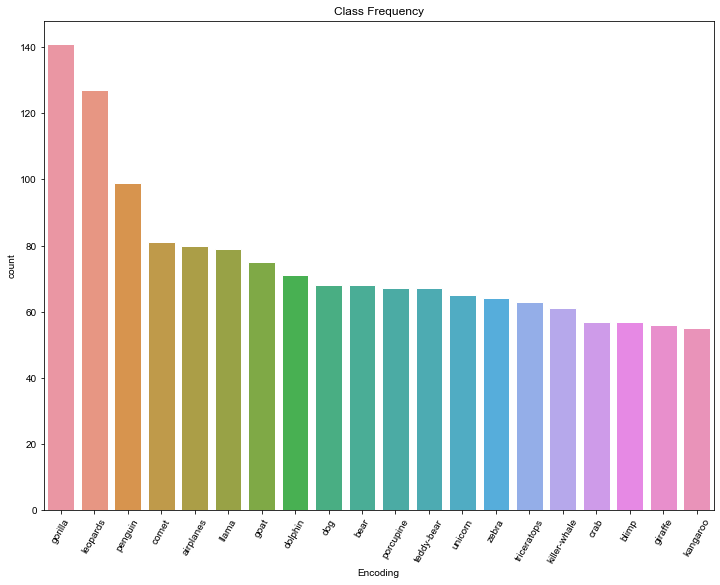

In [14]:
import seaborn as sns

plt.figure(figsize = (12, 9))
plt.xticks(rotation=60)
plt.title("Class Frequency")
sns.set(style="darkgrid")
sns.countplot(x = 'Encoding', data = df_eda, order = order_by_size);

From the visualizatino above, we observe that "gorilla", "leopards" and "penguin" has significantly larger image set.

**Image size**<br>

We first slect four image size column to see how the image size being random

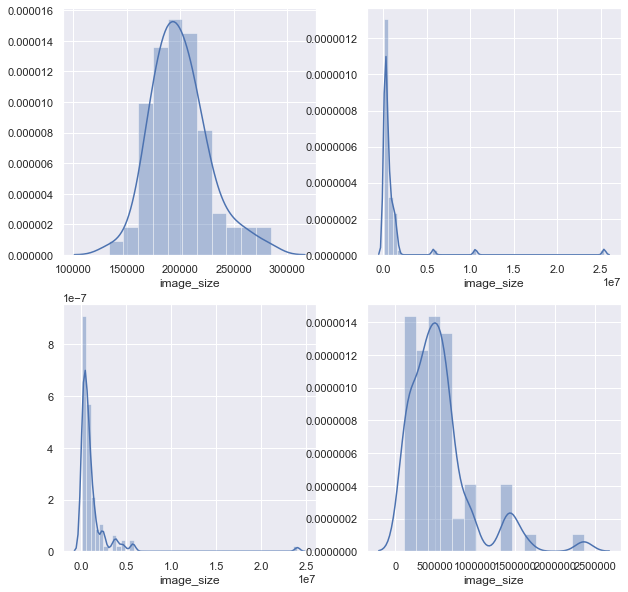

In [17]:
def draw_img(i):
    df_eda[df_eda['Encoding'] == types[i]]['image_size']

img_00 = df_eda[df_eda['Encoding'] == types[0]]['image_size']
img_01 = df_eda[df_eda['Encoding'] == types[1]]['image_size']
img_10 = df_eda[df_eda['Encoding'] == types[14]]['image_size']
img_11 = df_eda[df_eda['Encoding'] == types[18]]['image_size']

fig, axes = plt.subplots(2, 2, figsize = [10,10])

sns.distplot(img_00, label=types[0], ax=axes[0, 0])
sns.distplot(img_01, label=types[1], ax=axes[0, 1])
sns.distplot(img_10, label=types[14], ax=axes[1, 0])
sns.distplot(img_11, label=types[18], ax=axes[1, 1]);

From above, we can clearly see that we have different image size distribution for different image set. Let's draw a boxplot to gain a more holistic view of our data.

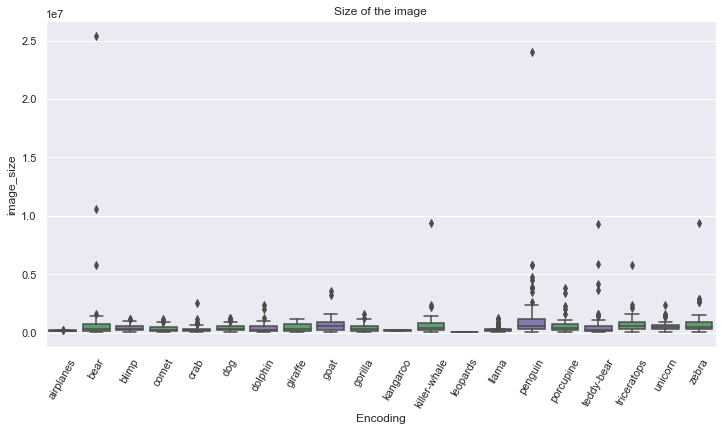

In [18]:
plt.figure(figsize = (12, 6))
plt.title("Size of the image")
plt.xticks(rotation=60)

sns.boxplot(x = 'Encoding', y = 'image_size', palette = ['m','g'], data = df_eda);

From the graph above, we believe it is safe to trim the imamge size that's larger than 5000000 to clean the data. We will clean the outliers and draw another boxblot.

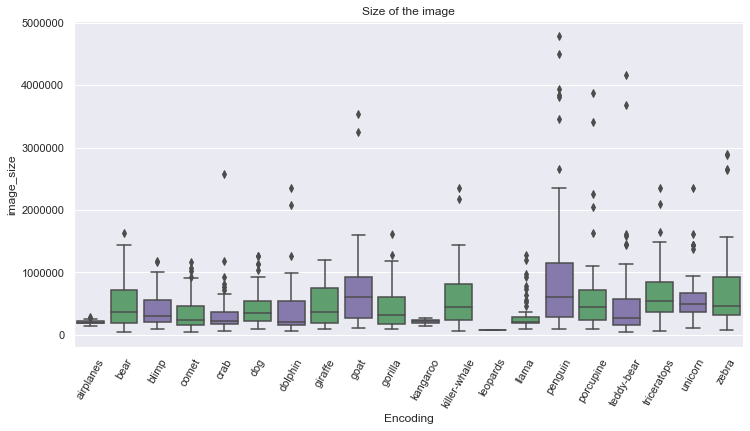

In [19]:
df_eda_clean = df_eda[df_eda['image_size'] < 5000000]

plt.figure(figsize = (12, 6))
plt.title("Size of the image")
plt.xticks(rotation=60)

sns.boxplot(x = 'Encoding', y = 'image_size', palette = ['m','g'], data = df_eda_clean);

We also notice that the picture set of "airplanes", "kangaroo", and "leopard" all has small amount of image size. We can leverage on this during our procedure of data training. Below we do some futher data analysis to help our feature selection.

In [20]:
# Calculating the largest image size for these three picture sets.
air_size = max(df_eda_clean[df_eda_clean['Encoding'] == 'airplanes']['image_size'])
kan_size = max(df_eda_clean[df_eda_clean['Encoding'] == 'kangaroo']['image_size'])
leo_size = max(df_eda_clean[df_eda_clean['Encoding'] == 'leopards']['image_size'])
print(air_size, kan_size,leo_size)

284616 268200 73728


Since these three sets have special small image size, we can set the cut off at 300000 and train the data seperately to gain a higher accuracy like we did in Porject3.

**Pixel Intensity**<br>

Now we check the pixel intensity using box plot.

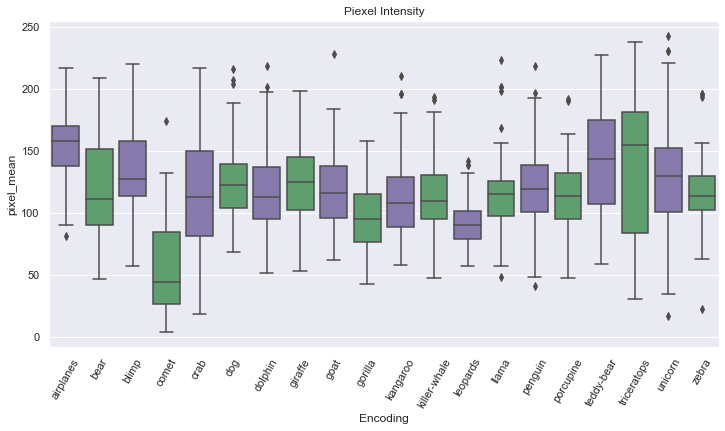

In [21]:
plt.figure(figsize = (12, 6))
plt.title("Piexel Intensity")
plt.xticks(rotation=60)

sns.boxplot(x = 'Encoding', y = 'pixel_mean', palette = ['m','g'], data = df_eda);

We can see that the piexel intensity is significantly less than the others. This is again something useful for our later part.

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [93]:
samples=starting_data_g['Pictures'][1]
end=ft12(samples)

In [95]:
flat=[1 if i else 0 for i in end.flatten()]

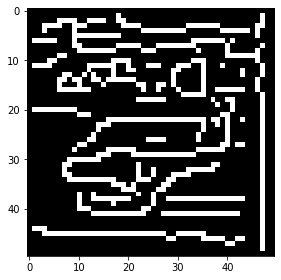

In [94]:
io.imshow(end)

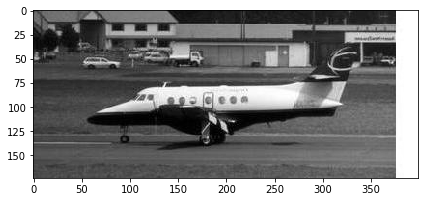

In [96]:
io.imshow(grayscale)

In [19]:
def feature_frame(df):
    #ref=df.copy(deep=True)
    #ref['red']=df['Pictures'].apply(color_matrix)
    grey=[]
    for image in df['Pictures']:
        grey.append(rgb2gray(image))
    df['grey']=grey
    df=pd.DataFrame({
        'size': df['Pictures'].apply(ft0),
        'red_avg': df['Pictures'].apply(ft1),
        'aspectratio': df['Pictures'].apply(ft2),
        'green_avg': df['Pictures'].apply(ft3),
        'blue_avg': df['Pictures'].apply(ft4),
        'red_std': df['Pictures'].apply(ft5),
        'green_std': df['Pictures'].apply(ft6),
        'blue_std': df['Pictures'].apply(ft7),
        'grey_std': df['grey'].apply(ft8),
        'colorful': df['Pictures'].apply(ft9),
        'num_blob': df['grey'].apply(ft10),
        'red_rank': df['Pictures'].apply(ft11),
        'green_rank': df['Pictures'].apply(ft13),
        'blue_rank': df['Pictures'].apply(ft14)#,
        #'encoding': df['Encoding']
    })
    return df
    #Returns data-frame with all the features now inside, and calculated


In [20]:
# data_from_nb1=pd.read_pickle("starting_data.pkl")
# df=feature_frame(data_from_nb1)
# df=df[df['size']<3000000].reset_index(drop=True)
# df.to_pickle('transformed_data.pkl')
data_from_nb1=pd.read_pickle("starting_data.pkl")
df=feature_frame(data_from_nb1)
df['encoding']=data_from_nb1['Encoding']
df=df[df['size']<3000000].reset_index(drop=True)

In [26]:
df.iloc[:, :-1].to_pickle('transformed_data.pkl')
df.iloc[:, -1].to_pickle('transformed_y.pkl')

In [17]:
test_from_nb1=pd.read_pickle("test_data.pkl")
df_test=feature_frame(test_from_nb1)
df_test.to_pickle('transformed_data_test.pkl')